In [2]:
import pandas as pd
artists  = pd.read_csv("/content/drive/MyDrive/VA_Project/artist.csv")
songs  = pd.read_csv("/content/drive/MyDrive/VA_Project/songs.csv")


In [ ]:
import pandas as pd
songss_x = pd.read_excel("/content/drive/MyDrive/VA_Project/songs_dataset_x_excel.xlsx")
songss_x

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,0.9950,0.708,0.028442,0.1950,0.563000,0.909091,0.1510,0.745000,0.0506,0.485348,0.7790
1,0.9940,0.379,0.051316,0.0135,0.901000,0.727273,0.0763,0.494026,0.0462,0.344019,0.0767
2,0.6040,0.749,0.018374,0.2200,0.000000,0.454545,0.1190,0.627609,0.9290,0.439086,0.8800
3,0.9950,0.781,0.032538,0.1300,0.887000,0.090909,0.1110,0.708887,0.0926,0.442470,0.7200
4,0.9900,0.210,0.126450,0.2040,0.908000,1.000000,0.0980,0.676079,0.0424,0.254614,0.0693
...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,0.029396,0.4430,0.000032,0.090909,0.0891,0.822786,0.1430,0.409732,0.3060
169905,0.0167,0.719,0.030076,0.3850,0.031300,0.727273,0.1110,0.768820,0.0403,0.524395,0.2700
169906,0.5380,0.514,0.032527,0.5390,0.002330,0.636364,0.1080,0.793485,0.1050,0.506778,0.1530
169907,0.0714,0.646,0.030046,0.7610,0.000000,0.090909,0.2220,0.899585,0.0385,0.532244,0.4720


In [ ]:
songs.describe(include='all')

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
count,169909.000000,169909,169909.000000,1.699090e+05,169909.000000,169909.000000,169909,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909,169909.000000,169909,169909.000000,169909.000000,169909.000000,169909.000000
unique,NaN,33375,NaN,NaN,NaN,NaN,169909,NaN,NaN,NaN,NaN,NaN,132940,NaN,10882,NaN,NaN,NaN,NaN
top,NaN,['Эрнест Хемингуэй'],NaN,NaN,NaN,NaN,1yZaVkklBi3CBDJ9t4f63N,NaN,NaN,NaN,NaN,NaN,Summertime,NaN,1945,NaN,NaN,NaN,NaN
freq,NaN,1215,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,62,NaN,1449,NaN,NaN,NaN,NaN
mean,0.493214,NaN,0.538150,2.314062e+05,0.488593,0.084863,NaN,0.161937,5.200519,0.206690,-11.370289,0.708556,NaN,31.556610,NaN,0.094058,116.948017,0.532095,1977.223231
std,0.376627,NaN,0.175346,1.213219e+05,0.267390,0.278679,NaN,0.309329,3.515257,0.176796,5.666765,0.454429,NaN,21.582614,NaN,0.149937,30.726937,0.262408,25.593168
min,0.000000,NaN,0.000000,5.108000e+03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,NaN,0.417000,1.710400e+05,0.263000,0.000000,NaN,0.000000,2.000000,0.098400,-14.470000,0.000000,NaN,12.000000,NaN,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,NaN,0.548000,2.086000e+05,0.481000,0.000000,NaN,0.000204,5.000000,0.135000,-10.474000,1.000000,NaN,33.000000,NaN,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,NaN,0.667000,2.629600e+05,0.710000,0.000000,NaN,0.086800,8.000000,0.263000,-7.118000,1.000000,NaN,48.000000,NaN,0.075400,135.712000,0.749000,1999.000000


In [ ]:
songs.popularity.value_counts()

0      27357
42      3280
43      3120
40      3061
44      3054
       ...  
93         3
97         1
96         1
99         1
100        1
Name: popularity, Length: 100, dtype: int64

# Plotting Heatmaps

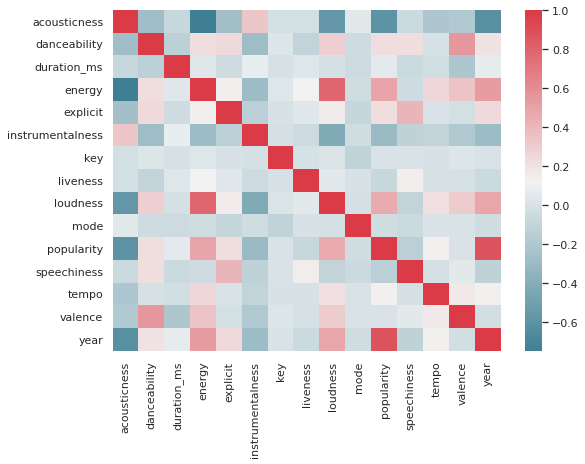

In [ ]:
import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline
corr = songs.corr()
sns.set(rc={'figure.figsize':(8.7,6.27)})
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

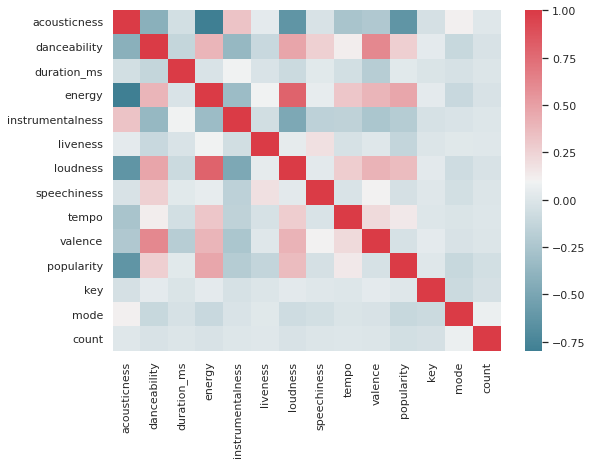

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8.7,6.27)})
corr = artists.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [3]:
songs3 = songs[songs['popularity']>0]

In [4]:
songs3.describe(include='all')

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
count,142552.000000,142552,142552.000000,1.425520e+05,142552.000000,142552.000000,142552,142552.000000,142552.000000,142552.000000,142552.000000,142552.000000,142552,142552.000000,142552,142552.000000,142552.000000,142552.000000,142552.000000
unique,NaN,27954,NaN,NaN,NaN,NaN,142552,NaN,NaN,NaN,NaN,NaN,109164,NaN,10427,NaN,NaN,NaN,NaN
top,NaN,['Frank Sinatra'],NaN,NaN,NaN,NaN,38llcrfX1arUqrEe0DRRzW,NaN,NaN,NaN,NaN,NaN,Summertime,NaN,1956,NaN,NaN,NaN,NaN
freq,NaN,592,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,59,NaN,966,NaN,NaN,NaN,NaN
mean,0.421372,NaN,0.546446,2.345441e+05,0.531999,0.086684,NaN,0.127020,5.203891,0.203019,-10.613328,0.709881,NaN,37.612605,NaN,0.078032,118.626089,0.536024,1984.035391
std,0.354563,NaN,0.173625,1.111261e+05,0.260818,0.281373,NaN,0.278055,3.519018,0.178617,5.347772,0.453819,NaN,18.094736,NaN,0.103235,30.357243,0.260744,21.783692
min,0.000000,NaN,0.000000,1.470800e+04,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,1.000000,NaN,0.000000,0.000000,0.000000,1921.000000
25%,0.063200,NaN,0.430000,1.751050e+05,0.324000,0.000000,NaN,0.000000,2.000000,0.095500,-13.411000,0.000000,NaN,25.000000,NaN,0.034000,95.275000,0.327000,1967.000000
50%,0.356000,NaN,0.556000,2.161070e+05,0.541000,0.000000,NaN,0.000087,5.000000,0.131000,-9.733000,1.000000,NaN,38.000000,NaN,0.043400,116.164000,0.546000,1985.000000
75%,0.773000,NaN,0.672000,2.678032e+05,0.746000,0.000000,NaN,0.024600,8.000000,0.255000,-6.660750,1.000000,NaN,51.000000,NaN,0.070000,137.413000,0.753000,2002.000000


In [5]:
songs2 = songs[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence']]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( songs2, songs['popularity'], test_size=0.2, random_state=42)

# Modeling 

## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
ypred = lr.predict(X_train)
ypred_test = lr.predict(X_test)

### Plotting Learning Curves

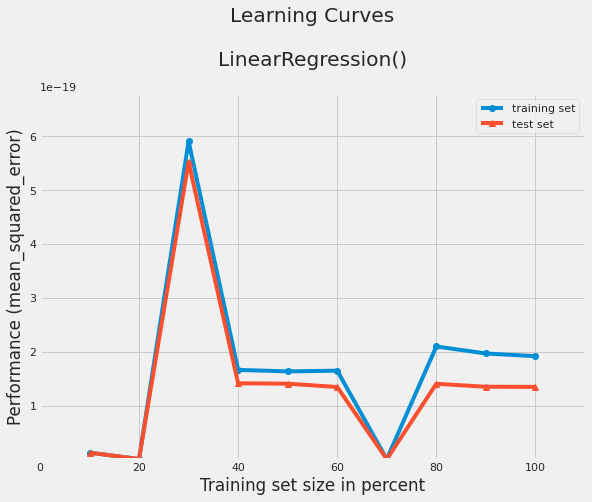

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, ypred, X_test, ypred_test, lr,scoring='mean_squared_error')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,ypred)
print(r2)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,ypred_test)
print(r2)

## Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
clf = RandomForestRegressor(n_jobs=-1)
clf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1)

In [8]:
def get_feature_importance(dataframe, model):
    ## Get important Features
    feat_importances = pd.Series(model.feature_importances_, index = dataframe .columns)

    ## Sort importances
    feat_importances_ordered = feat_importances.nlargest(n=40)
    feat_importances_ordered

    ## Plotting Importance
    feat_importances_ordered.plot(kind='barh')
    plt.show()

# get_feature_importance(X_train, clf)

In [9]:
X_train[['acousticness', 'danceability', 'duration_ms', 'energy',
   'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
   'tempo', 'valence']].head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
31517,0.00108,0.209,137872,0.780,0.025300,1,0.2120,-3.245,0.0512,102.877,0.626
708,0.86800,0.397,175333,0.775,0.000500,0,0.6010,-3.068,0.1330,82.560,0.875
110555,0.40100,0.679,148320,0.471,0.000018,4,0.5520,-12.643,0.0577,112.946,0.674
4104,0.15900,0.709,192867,0.654,0.000015,0,0.1010,-5.904,0.0272,108.968,0.829
148835,0.04110,0.565,243093,0.628,0.000000,7,0.0763,-10.504,0.0416,127.394,0.896


In [13]:
ypred = clf.predict(X_train[['acousticness', 'danceability', 'duration_ms', 'energy',
   'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
   'tempo', 'valence']])
ypred_test = clf.predict(X_test[['acousticness', 'danceability', 'duration_ms', 'energy',
   'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
   'tempo', 'valence']])

### Plotting Learning Curves

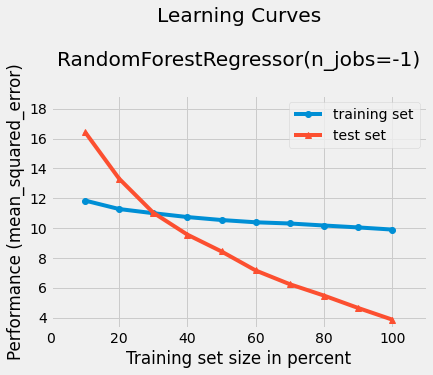

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, ypred, X_test, ypred_test, clf,scoring='mean_squared_error')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,ypred)
print(r2)

0.9431448031600045


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,ypred_test)
print(r2)

0.6141272686364176


### Getting Feature Importance from Tree based models

In [ ]:
## Get important Features
feat_importances = pd.Series(clf.feature_importances_, index = X_train .columns)

In [ ]:
## Sort importances  
feat_importances_ordered = feat_importances.nlargest(n=41)
feat_importances_ordered

acousticness        0.554301
loudness            0.111101
valence             0.065309
liveness            0.055970
danceability        0.042689
duration_ms         0.040904
instrumentalness    0.033391
speechiness         0.030341
energy              0.025648
tempo               0.022305
count               0.009494
key                 0.008547
dtype: float64

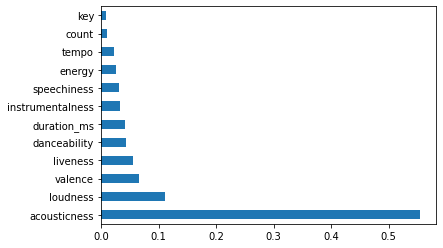

In [ ]:
## Plot Importance
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline
feat_importances_ordered.plot(kind='barh')
plt.show()

## Random Forest with GridSearch CV

In [32]:
rf_grid = RandomForestRegressor(n_jobs=-1)
param_grid = {"n_estimators" : [50,100],
           "max_depth" : [ 7, 10, 20],
           "min_samples_leaf" : [20,45,60]}
 
rf_cv_grid = GridSearchCV(estimator = rf_grid, param_grid = param_grid, cv = 5,n_jobs=-1)
rf_cv_grid.fit(X_train, y_train)
rf_cv_grid.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=20, n_jobs=-1)

In [33]:
ypred = rf_cv_grid.best_estimator_.predict(X_train)
ypred_test = rf_cv_grid.best_estimator_.predict(X_test)

### Plotting Learning Curves

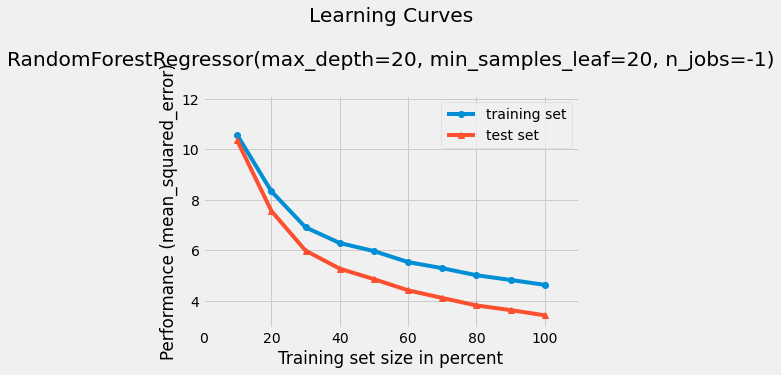

In [34]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, ypred, X_test, ypred_test, rf_cv_grid.best_estimator_,scoring='mean_squared_error')
plt.show()

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,ypred)
print(r2)

0.6985798260656599


In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,ypred_test)
print(r2)

0.6079717172454466


# Artists Dataset

In [16]:
artists.columns

Index(['artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode', 'count'],
      dtype='object')

In [17]:
artists2 = artists[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'count']]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( artists2.drop("popularity",axis=1), artists2['popularity'], test_size=0.2, random_state=42)

## Linear Regression

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
ypred = lr.predict(X_train)
ypred_test = lr.predict(X_test)


### Plotting Learning Curves

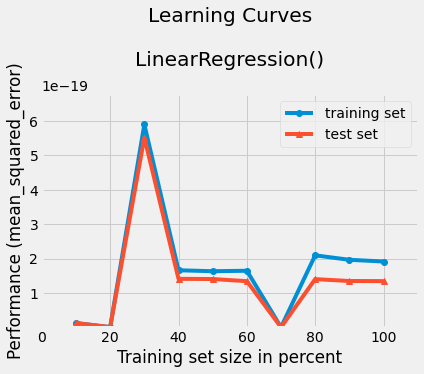

In [22]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, ypred, X_test, ypred_test, lr,scoring='mean_squared_error')
plt.show()

In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,ypred)
print(r2)

0.45882828948608856


In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,ypred_test)
print(r2)

0.4587446696649542


## Random Forest

In [ ]:

clf = RandomForestRegressor(n_jobs=-1)
clf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1)

In [ ]:
ypred = clf.predict(X_train)
ypred_test = clf.predict(X_test)

### Plotting Learning Curves

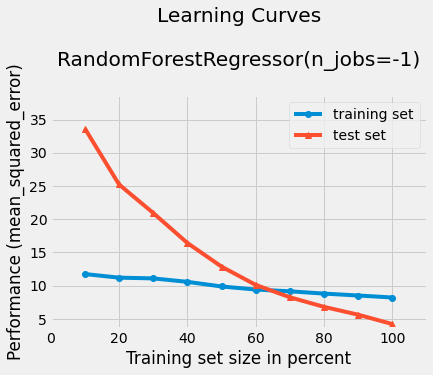

In [ ]:
plot_learning_curves(X_train, ypred, X_test, ypred_test, clf,scoring='mean_squared_error')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,ypred)
print(r2)

0.9593506972586875


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,ypred_test)
print(r2)

0.7097509887779363


## Random Forest with Grid Search CV

In [ ]:
rf_grid = RandomForestRegressor(n_jobs=-1)
param_grid = {"n_estimators" : [50,100],
           "max_depth" : [ 7, 10, 20],
           "min_samples_leaf" : [20,45,60]}
 
rf_cv_grid = GridSearchCV(estimator = rf_grid, param_grid = param_grid, cv = 5)
rf_cv_grid.fit(X_train, y_train)
rf_cv_grid.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=20, n_jobs=-1)

In [ ]:
ypred = rf_cv_grid.best_estimator_.predict(X_train)
ypred_test = rf_cv_grid.best_estimator_.predict(X_test)

### Plotting Learning Curves

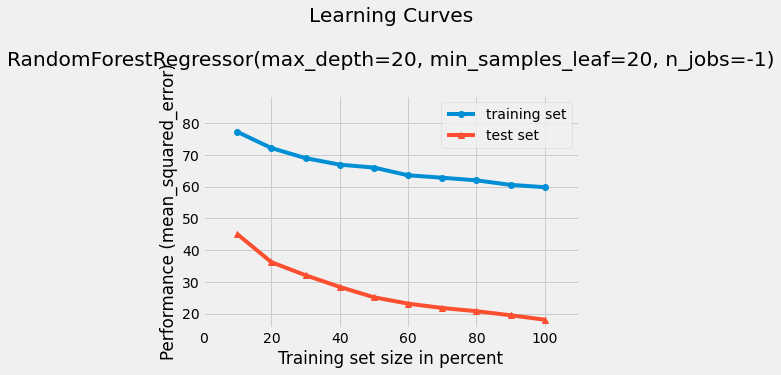

In [ ]:
plot_learning_curves(X_train, ypred, X_test, ypred_test, rf_cv_grid.best_estimator_,scoring='mean_squared_error')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,ypred)
print(r2)

0.7189084762874246


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,ypred_test)
print(r2)

0.6516060587731578


### Getting Feature Importance

In [ ]:
## Get important Features
feat_importances = pd.Series(rf_cv_grid.best_estimator_.feature_importances_, index = X_train .columns)

In [ ]:
## Sort importances  
feat_importances_ordered = feat_importances.nlargest(n=41)
feat_importances_ordered

acousticness        0.648656
loudness            0.114802
valence             0.058265
liveness            0.051512
danceability        0.031892
duration_ms         0.026192
instrumentalness    0.025065
speechiness         0.015624
energy              0.014180
tempo               0.007844
count               0.004364
key                 0.001604
dtype: float64

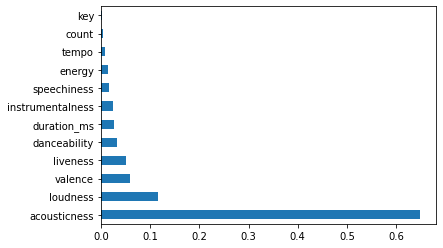

In [ ]:
## Plot Importance
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline
feat_importances_ordered.plot(kind='barh')
plt.show()

# OPTICS Clustering

In [ ]:
pd.read_csv("clustering_hana.csv")

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,kmeans,ward,complete,average,single,id,pca1,pca2,tsne1,tsne2
0,0.9900,0.210,0.2040,0.908000,0.0980,0.677256,0.0424,0.254614,0.0693,8,9,0,0,0,6N6tiFZ9vLTSOIxkj8qKrd,1.024585,0.546189,33.225710,28.768063
1,0.9890,0.170,0.0823,0.911000,0.0962,0.468954,0.0317,0.352283,0.3460,8,9,0,0,0,6QIONtzbQCbnmWNwn0H1yT,1.040260,0.380986,29.691717,41.710354
2,0.9770,0.305,0.0830,0.697000,0.2310,0.613470,0.0331,0.330295,0.0479,8,9,0,0,0,6duqhjENDYbR2Q4Hpogh9M,1.005221,0.400223,26.245148,-2.528315
3,0.9900,0.337,0.0699,0.903000,0.1060,0.567802,0.0322,0.295517,0.1350,8,9,0,0,0,6hUMURfCaJ6JB8EWL1ZLr7,1.066209,0.445275,32.760010,34.758990
4,0.9850,0.355,0.0452,0.825000,0.1530,0.562798,0.0329,0.346391,0.2760,8,9,0,0,0,6j8nMxm9yFxN3Mdodm9tEl,1.006414,0.311425,29.033144,40.063270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142547,0.1730,0.875,0.4430,0.000032,0.0891,0.824219,0.1430,0.409732,0.3060,10,-1,-1,-1,-1,4KppkflX7I3vJQk7urOJaS,-0.160869,0.039555,40.275524,-1.326706
142548,0.0167,0.719,0.3850,0.031300,0.1110,0.770159,0.0403,0.524395,0.2700,10,-1,-1,-1,-1,1ehhGlTvjtHo2e4xJFB0SZ,-0.199051,0.189858,39.562122,-6.098898
142549,0.5380,0.514,0.5390,0.002330,0.1080,0.794867,0.1050,0.506778,0.1530,10,-1,-1,-1,-1,52eycxprLhK3lPcRLbQiVk,0.152793,0.109856,-31.554756,-28.559607
142550,0.0714,0.646,0.7610,0.000000,0.2220,0.901151,0.0385,0.532244,0.4720,7,-1,-1,-1,-1,3wYOGJYD31sLRmBgCvWxa4,-0.426606,0.115415,-11.995120,16.776615


In [ ]:
hana_data = pd.read_csv("clustering_hana.csv")

In [ ]:
hana_data2  = hana_data[['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

In [ ]:
from sklearn import metrics
from sklearn.cluster import OPTICS
import pickle
dbs = OPTICS(metric= 'euclidean',n_jobs = -1)

hana_data2_new = dbs.fit_predict(hana_data2)

In [ ]:
score = metrics.silhouette_score(hana_data2, dbs.labels_, metric='euclidean')
score

-0.6094464793593994

In [ ]:
pd.Series((dbs.labels_)).value_counts()

-1       134799
 1178        22
 969         18
 921         17
 137         16
          ...  
 321          5
 193          5
 960          5
 832          5
 0            5
Length: 1196, dtype: int64

In [ ]:
pd.DataFrame(dbs.labels_).to_csv("labels_optics",sep= ',')

In [ ]:
pickle.dump(dbs, open("optics_clustering_data", 'wb'))

In [ ]:
safss = pd.concat([pd.DataFrame(train_set),pd.DataFrame(dbs.labels_)],axis=1)

In [ ]:
safss.to_csv("OPTICS_Data.csv",sep = ',')

# Looking at the subgroups in the data (Rules generation)

In [ ]:
pip install random-subgroups

     |████████████████████████████████| 80 kB 5.1 MB/s 


## Artists dataset

In [ ]:
from randomsubgroups import RandomSubgroupRegressor
# from sklearn import datasets

# specifying target variable
y = artists.popularity

# our independent variables
X=artists.copy().drop(["popularity","artists"],axis=1)

# n_estimators total no of rules that are generated
sg_classifier = RandomSubgroupRegressor(n_estimators=30,max_depth=5)

sg_classifier.fit(X, y)



RandomSubgroupRegressor(max_depth=5, max_features=3, n_estimators=30)

In [ ]:
sg_classifier.show_models()

Target: 7.424043093246476; Model: acousticness>=0.87 AND duration_ms<207085.46 AND valence>=0.22
Target: 9.180235806238993; Model: acousticness>=0.86 AND instrumentalness>=0.12 AND valence>=0.22
Target: 9.45456690541231; Model: acousticness>=0.87 AND valence>=0.22
Target: 9.652796735759654; Model: acousticness>=0.87 AND valence>=0.22
Target: 9.669025481749005; Model: acousticness>=0.86 AND energy<0.79 AND liveness>=0.12
Target: 9.976120782047872; Model: acousticness>=0.86 AND energy<0.44 AND liveness>=0.12
Target: 10.333748265688355; Model: acousticness>=0.86 AND instrumentalness>=0.12 AND liveness>=0.12 AND loudness<-9.20
Target: 10.862782578938342; Model: acousticness>=0.87 AND danceability<0.73 AND duration_ms<206800.0 AND energy<0.44
Target: 11.44458645412135; Model: acousticness>=0.86 AND energy<0.32 AND instrumentalness<0.55
Target: 12.861744525594085; Model: acousticness>=0.63 AND instrumentalness>=0.11 AND valence>=0.22
Target: 13.786186528414202; Model: acousticness>=0.86
Targ

In [ ]:
sorted_list = [[sg_classifier.target, sg_classifier] for sg_classifier in
                sorted(sg_classifier.estimators_, key=lambda e: e.target)]

In [ ]:
pd.set_option("max_columns",100)
rules_df = pd.DataFrame(sorted_list,columns= ['Target','Rules'])
rules_df

,Target,Rules
0,5.688628,acousticness>=0.87 AND instrumentalness>=0.12 ...
1,8.295231,acousticness>=0.87 AND energy<0.45 AND livenes...
2,8.601598,acousticness>=0.63 AND duration_ms<207004.86 A...
3,8.870894,acousticness>=0.87 AND danceability<0.73 AND l...
4,9.159171,acousticness>=0.86 AND liveness>=0.12
5,9.693645,acousticness>=0.87 AND energy<0.44 AND livenes...
6,9.825834,acousticness>=0.86 AND liveness>=0.12
7,11.021965,acousticness>=0.86 AND energy<0.32 AND valence...
8,13.347847,acousticness>=0.87
9,13.513991,acousticness>=0.86


In [ ]:
rules_df.to_csv("rules_df_artists.csv",sep = ',',index=False)

## Songs dataset

In [ ]:
songs.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [ ]:
X=songs.copy().drop(["popularity","artists",'name'],axis=1)
X

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year
0,0.9950,0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,1928,0.0506,118.469,0.7790,1928
1,0.9940,0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,1928,0.0462,83.972,0.0767,1928
2,0.6040,0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,2020-02-28,0.0385,129.916,0.4720,2020


In [ ]:
from randomsubgroups import RandomSubgroupRegressor
# from sklearn import datasets

# specifying target variable
y = songs.popularity

# our independent variables
X=songs.copy().drop(["popularity","artists",'name','id','release_date','year'],axis=1)

# n_estimators total no of rules that are generated
sg_classifier = RandomSubgroupRegressor(n_estimators=30,max_depth=5)

sg_classifier.fit(X, y)



RandomSubgroupRegressor(max_depth=5, max_features=3, n_estimators=30)

In [ ]:
sg_classifier.show_models()

Target: 9.91744151169766; Model: acousticness>=0.85 AND duration_ms<197396.29 AND speechiness>=0.03
Target: 10.495787560915174; Model: acousticness>=0.85 AND instrumentalness>=0.04 AND liveness>=0.08
Target: 10.826428945988464; Model: acousticness>=0.85 AND duration_ms<197467.0
Target: 10.929006935446994; Model: acousticness>=0.85 AND instrumentalness>=0.03
Target: 11.380238500851789; Model: acousticness>=0.85 AND speechiness>=0.03 AND tempo<83.08
Target: 11.638239370009458; Model: acousticness>=0.85 AND speechiness>=0.03
Target: 11.694187321781092; Model: acousticness>=0.85 AND danceability<0.73 AND duration_ms<197373.0 AND energy<0.42
Target: 12.438128140703517; Model: acousticness>=0.85 AND tempo<82.93
Target: 12.54382285820021; Model: acousticness>=0.85
Target: 13.5484142413603; Model: acousticness>=0.85 AND energy<0.29 AND loudness<-7.60
Target: 13.952447650395685; Model: danceability<0.73 AND duration_ms<197200.0 AND energy<0.42 AND loudness<-9.49 AND speechiness>=0.03
Target: 14

In [ ]:
sorted_list = [[sg_classifier.target, sg_classifier] for sg_classifier in
                sorted(sg_classifier.estimators_, key=lambda e: e.target)]

In [ ]:
pd.set_option("max_columns",100)
rules_df = pd.DataFrame(sorted_list,columns= ['Target','Rules'])
rules_df

,Target,Rules
0,9.917442,acousticness>=0.85 AND duration_ms<197396.29 A...
1,10.495788,acousticness>=0.85 AND instrumentalness>=0.04 ...
2,10.826429,acousticness>=0.85 AND duration_ms<197467.0
3,10.929007,acousticness>=0.85 AND instrumentalness>=0.03
4,11.380239,acousticness>=0.85 AND speechiness>=0.03 AND t...
5,11.638239,acousticness>=0.85 AND speechiness>=0.03
6,11.694187,acousticness>=0.85 AND danceability<0.73 AND d...
7,12.438128,acousticness>=0.85 AND tempo<82.93
8,12.543823,acousticness>=0.85
9,13.548414,acousticness>=0.85 AND energy<0.29 AND loudnes...


In [ ]:
rules_df.to_csv("rules_df_songs.csv",sep = ',',index=False)